In [1]:
import pandas as pd

# Define column names for your dataset
column_names = ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
                'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']

# Read the dataset from CSV file
df = pd.read_csv("/content/Reviews.csv", names=column_names)

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())


First few rows of the DataFrame:
   Id   ProductId          UserId                      ProfileName  \
0  Id   ProductId          UserId                      ProfileName   
1   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
2   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
3   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
4   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0  HelpfulnessNumerator  HelpfulnessDenominator  Score        Time   
1                     1                       1      5  1303862400   
2                     0                       0      1  1346976000   
3                     1                       1      4  1219017600   
4                     3                       3      2  1307923200   

                 Summary                                               Text  
0                Summary                       

<ipython-input-1-b40bac4e2941>:8: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Reviews.csv", names=column_names)


In [4]:
import pandas as pd

# Load the dataset from the provided path
df = pd.read_csv("/content/Reviews.csv")

# Only keep the columns we need
df = df[['Score', 'Text']]

# Map the target labels to 'Negative' and 'Positive'
df['Sentiment'] = df['Score'].map({1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'})

# Drop neutral reviews
df = df[df['Sentiment'] != 'Neutral']

# Check the balance of the classes
print(df['Sentiment'].value_counts())


Positive    443777
Negative     82037
Neutral      42640
Name: Sentiment, dtype: int64


In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Load your dataset

# Define the set of stopwords
stop_words = set(stopwords.words('english'))

# Define a function to preprocess text
def preprocess_text(text):
    # Remove any non-word characters and make everything lower case
    text = re.sub('[^a-zA-Z]', ' ', text.lower())
    # Split the text into words and remove stopwords, then stem words
    words = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    # Join words back into a single string
    return ' '.join(words)

# Apply the preprocessing function to the 'Text' column
df['Text'] = df['Text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
from sklearn.model_selection import train_test_split

# Assuming you already preprocessed the text and stored it in the 'Text' column
X = df['Text']
y = df['Sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer with maximum features
vectorizer = CountVectorizer(max_features=5000)

# Fit and transform the training data
X_train = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test = vectorizer.transform(X_test)


In [8]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
from sklearn.metrics import classification_report

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

    Negative       0.74      0.64      0.68     16181
     Neutral       0.49      0.18      0.27      8485
    Positive       0.89      0.97      0.93     89025

    accuracy                           0.86    113691
   macro avg       0.71      0.60      0.63    113691
weighted avg       0.84      0.86      0.84    113691



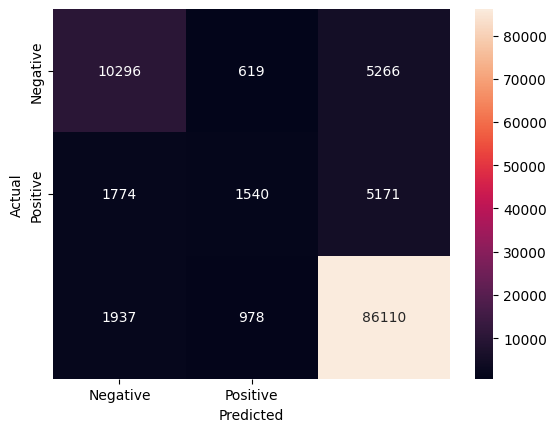

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, predictions)
sns.heatmap(conf_mat, annot=True, fmt="d",
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


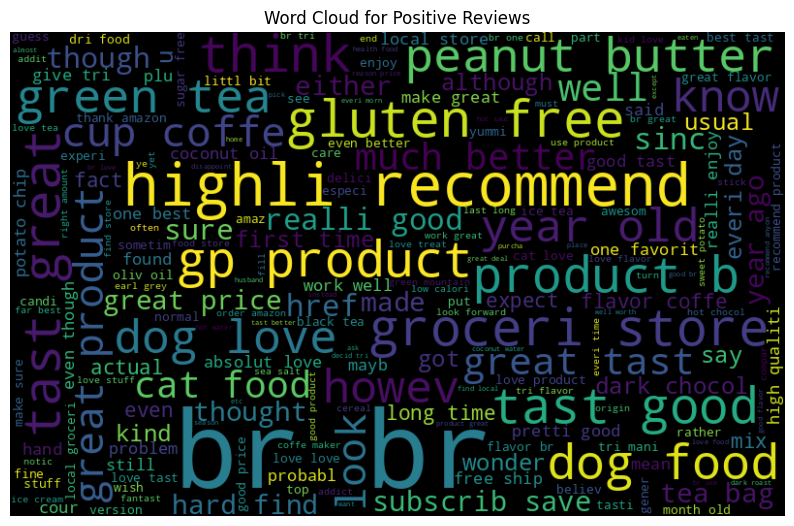

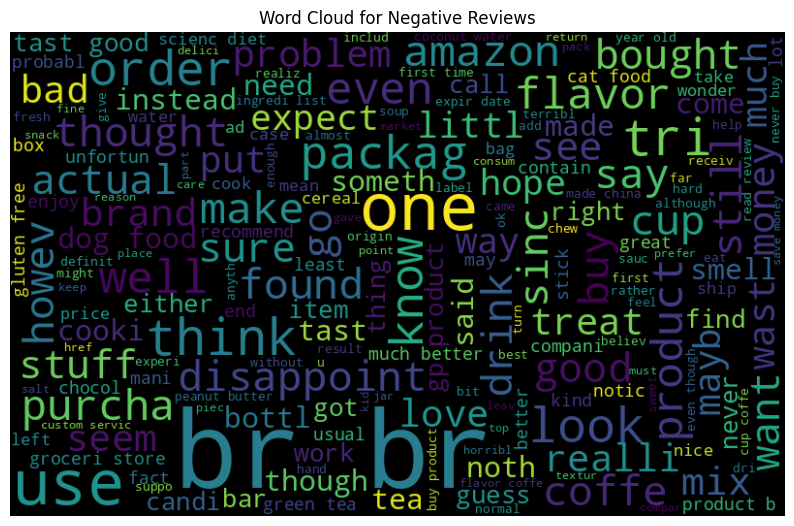

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate positive and negative reviews
positive_reviews = df[df['Sentiment'] == 'Positive']
negative_reviews = df[df['Sentiment'] == 'Negative']

# Generate word cloud for positive reviews
positive_text = ' '.join(positive_reviews['Text'])
positive_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_text)

# Plot word cloud for positive reviews
plt.figure(figsize=(10, 7))
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud for Positive Reviews")
plt.show()

# Generate word cloud for negative reviews
negative_text = ' '.join(negative_reviews['Text'])
negative_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_text)

# Plot word cloud for negative reviews
plt.figure(figsize=(10, 7))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud for Negative Reviews")
plt.show()
